In [1]:
import json

# Load your JSON data
with open('checkpoint.json', 'r') as file:
    data = json.load(file)

In [2]:
import numpy as np
import pandas as pd

# Define the range of thresholds
thresholds = np.arange(0.0, 1.05, 0.05)

# Initialize a list to store the metrics for each threshold
metrics = []

# Iterate over each threshold
for threshold in thresholds:
    correct_predictions = 0
    correct_contexts = 0
    
    for item in data["data"]:
        if item["similarity_score"] >= threshold:
            correct_predictions += 1
        if item["context_found"] == True:
            correct_contexts += 1
    
    total_questions = len(data["data"])
    accuracy = correct_predictions / total_questions
    recall = correct_contexts / total_questions
    
    # Store the metrics
    metrics.append({'Threshold': threshold, 'Accuracy': accuracy, 'Recall': recall})

In [3]:
# Convert metrics into a DataFrame
df_metrics = pd.DataFrame(metrics)

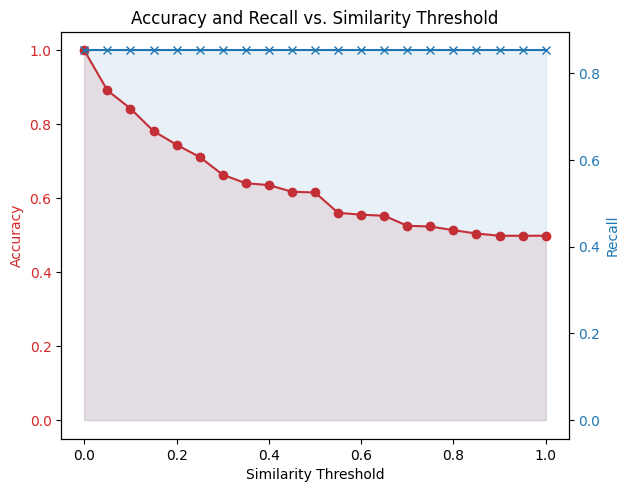

In [4]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Similarity Threshold')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(df_metrics['Threshold'], df_metrics['Accuracy'], color=color, label='Accuracy', marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(df_metrics['Threshold'], 0, df_metrics['Accuracy'], color=color, alpha=0.1)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Recall', color=color)  # We already handled the x-label with ax1
ax2.plot(df_metrics['Threshold'], df_metrics['Recall'], color=color, label='Recall', marker='x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.fill_between(df_metrics['Threshold'], 0, df_metrics['Recall'], color=color, alpha=0.1)

fig.tight_layout()  # Otherwise the right y-label is slightly clipped
plt.title('Accuracy and Recall vs. Similarity Threshold')
plt.show()

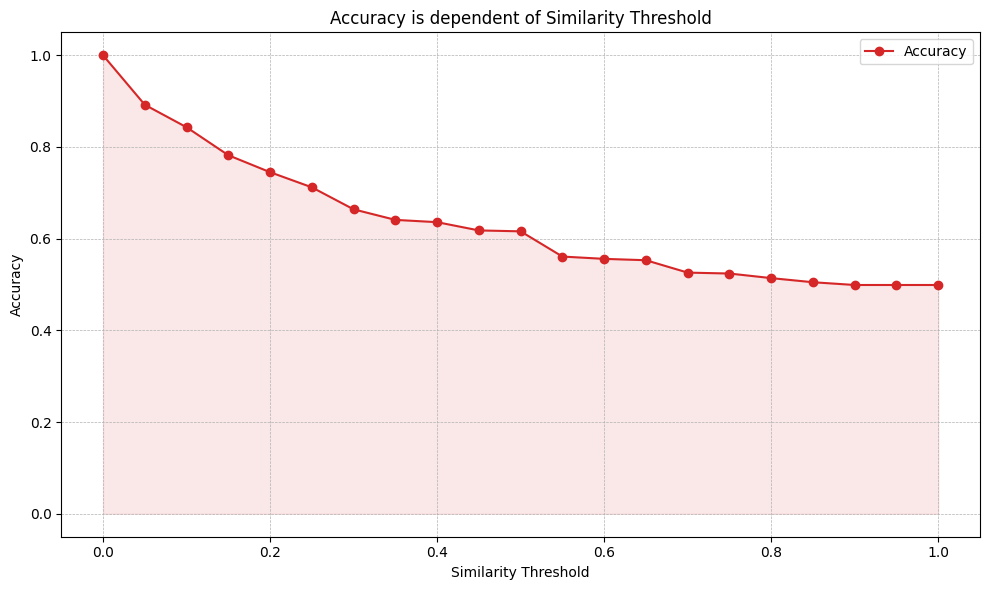

In [6]:
plt.figure(figsize=(10, 6))  # Set figure size for better visibility

plt.plot(df_metrics['Threshold'], df_metrics['Accuracy'], label='Accuracy', color='tab:red', marker='o')
plt.fill_between(df_metrics['Threshold'], 0, df_metrics['Accuracy'], color='tab:red', alpha=0.1)

plt.xlabel('Similarity Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy is dependent of Similarity Threshold')
plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust the layout to make room for the legend and title
plt.show()